Rep 1 completed for sample_size=1. Total execution time: <module 'time' (built-in)>.
Rep 2 completed for sample_size=1. Total execution time: <module 'time' (built-in)>.
Rep 3 completed for sample_size=1. Total execution time: <module 'time' (built-in)>.
Rep 1 completed for sample_size=2. Total execution time: <module 'time' (built-in)>.
Rep 2 completed for sample_size=2. Total execution time: <module 'time' (built-in)>.
Rep 3 completed for sample_size=2. Total execution time: <module 'time' (built-in)>.
Rep 1 completed for sample_size=5. Total execution time: <module 'time' (built-in)>.
Rep 2 completed for sample_size=5. Total execution time: <module 'time' (built-in)>.
Rep 3 completed for sample_size=5. Total execution time: <module 'time' (built-in)>.
Rep 1 completed for sample_size=10. Total execution time: <module 'time' (built-in)>.
Rep 2 completed for sample_size=10. Total execution time: <module 'time' (built-in)>.
Rep 3 completed for sample_size=10. Total execution time: <modu

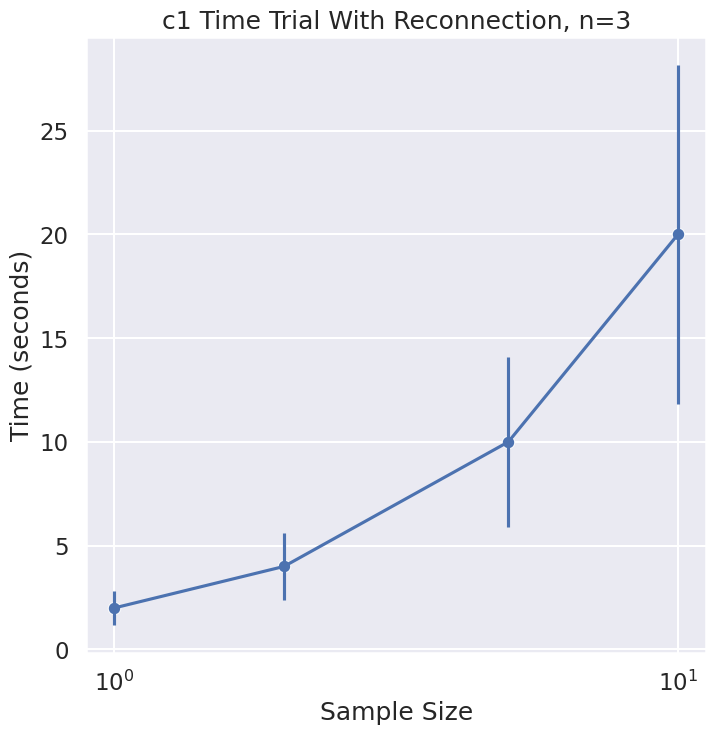

In [37]:
import pandas as pd
import numpy as np
import duckdb
import matplotlib.pyplot as plt
import time
import seaborn as sns

from l2therm_in import path
import c1

sns.set_style("whitegrid")
sns.set_theme(context='talk')

sizes = [1,2,5,10]
n_reps = 3  
times = []


for s in sizes:
    for rep in range(n_reps):
        df, time = fetch_data(path, s)
        times.append(time)
        print(f'Rep {rep+1} completed for sample_size={s}. Total execution time: {time}.')
        del df

sublists = [times[n:n+n_reps] for n in range(0, len(times), n_reps)]
        
avg_list = [np.mean(i) for i in sublists]
std_list = [np.std(i) for i in sublists]

fig, ax = plt.subplots(figsize=(8,8))
ax.set_title(f'c1 Time Trial With Reconnection, n={n_reps}')
sns.scatterplot(ax = ax, x=sizes,y=avg_list)
ax.errorbar(x = sizes, y = avg_list, yerr = std_list)
ax.set_xlabel('Sample Size')
ax.set_ylabel('Time (seconds)')
plt.xscale('log')

plt.savefig('c1_time_trial_w_reconnect.png');
print('Data plotted. Time trial complete.')



In [36]:
std_list

[0.816496580927726, 0.816496580927726, 0.816496580927726, 0.816496580927726]